Datasets can be downloaded from [here](https://www.dropbox.com/sh/yqlclftyolwqy7y/AADVD-_IOqpXQx8PlWcywMypa?dl=0)  
**Datasets have been normalized.**

Ref: Olsson, A. et al. Single-cell analysis of mixed-lineage states leading to a binary cell fate choice. Nature (2016).

In [1]:
import stream as st
import scanpy
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import os
from pandas.plotting import table 
st.__version__

/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.1'

### Run stream for reference

Saving results in: ./stream_result
500 variable genes are selected
feature var_genes is being used ...
4 cpus are being used ...


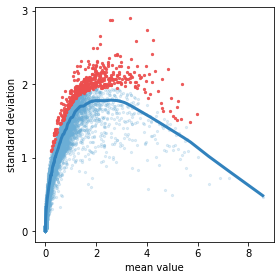

In [65]:
## Set analysis name- for reading/writing data
analysis_name="cd8_nsclc_downsample"

## Load h5ad object (from seurat)
filename="analysis/STREAM/" + analysis_name + ".h5ad"
adata = scanpy.read_h5ad(filename)
st.set_workdir(adata,'./stream_result')

## Make variable names unique
adata.var_names_make_unique()

## Convert to array
adata.X=adata.X.toarray()

## Calculate QC metrics
st.cal_qc(adata,assay='rna')

###Remove mitochondrial genes 
st.remove_mt_genes(adata)

## Variable genes
st.select_variable_genes(adata,loess_frac=0.01, n_genes=500)

## dimension reduction
st.dimension_reduction(adata,method='mlle',feature='var_genes',n_components=4,n_neighbors=50,n_jobs=4)



In [66]:
adata.var_names

Index(['A1BG', 'NAT2', 'ADA', 'CDH2', 'AKT3', 'GAGE12F', 'ZBTB11-AS1', 'MED6',
       'NR2E3', 'NAALAD2',
       ...
       'TTTY23B', 'SNORD115-23', 'MIR214', 'SNAR-A9', 'MIR644B', 'MIR3680-1',
       'HOXB-AS5', 'SEPT15', 'GAGE5', 'SNORD115-19'],
      dtype='object', length=25394)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 7
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1156 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
3.562
	
50
	
49
	
42
	
3
	
0
	
0
	
0.8582
	
0.799
	
0.9901
	
0.9908
	
2.577
	
0.1274
	
6.368
	
318.4
	
0


7.63 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7
Shifting branching point to denser area ...
[1]
 "Moving the branching point at node 2"


[1]
 "Moving the branching point at no

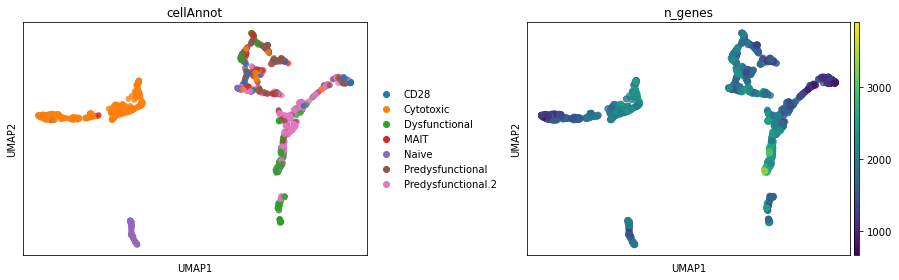

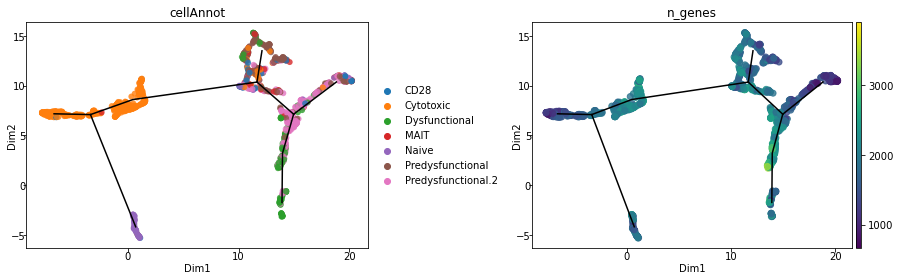

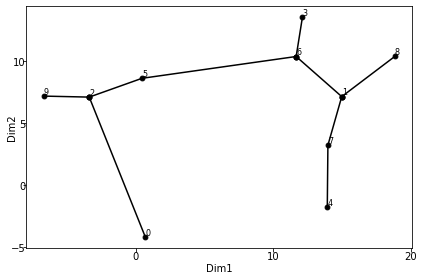

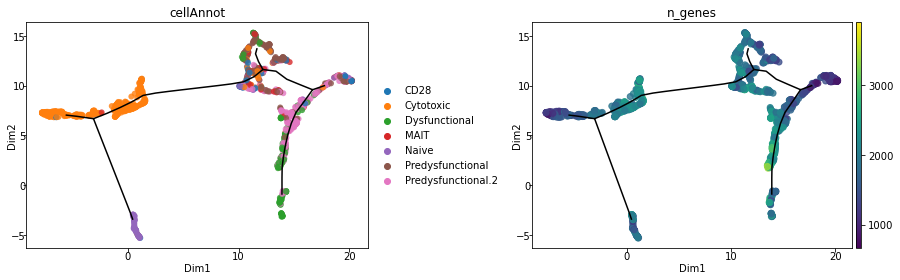

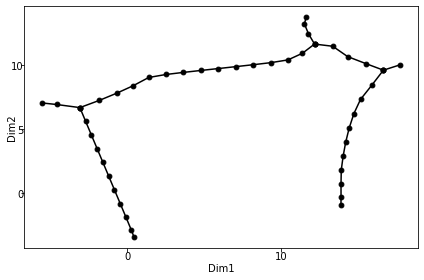

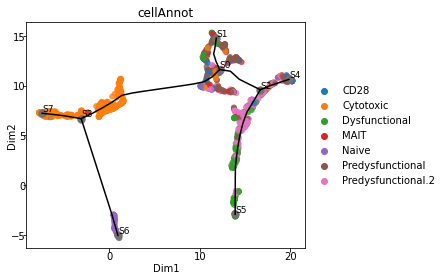

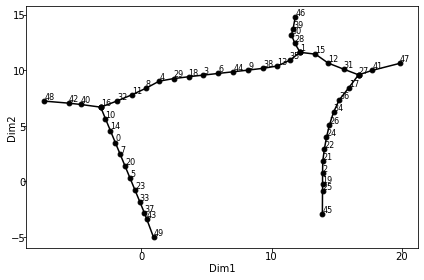

In [18]:
st.plot_visualization_2D(adata,n_neighbors=50,method='umap',color=['cellAnnot','n_genes'],use_precomputed=False)

## Run trajectory
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)
st.plot_dimension_reduction(adata,color=['cellAnnot','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.05,epg_lambda=0.05)

## Edit branches
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,color=['cellAnnot','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
                                         
## Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['cellAnnot'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

## save output
filename='stream_result_forMapping_' + analysis_name + '.pkl'
st.write(adata,file_name=filename)

### Load in preprocessed reference stream object

In [19]:
analysis_name = "cd8_nsclc_downsample"
adata_ref=st.read('./stream_result/stream_result_forMapping_' + analysis_name + '.pkl')
figure_dir="figures/STREAM/" + analysis_name
if not os.path.isdir(figure_dir):
    os.mkdir(figure_dir)

Working directory is already specified as './stream_result' 
To change working directory, please run set_workdir(adata,workdir=new_directory)


### Load in data to be mapped to reference (h5ad)

In [67]:
## Load in merged cd8 glioma/melanoma object
adata_map=scanpy.read_h5ad("analysis/STREAM/cd8_melanoma.glioma_downsample.h5ad")
st.set_workdir(adata_map,'./stream_result')
adata_map.var_names_make_unique()
adata_map.X=adata_map.X.toarray()

Saving results in: ./stream_result


In [75]:
## Load h5ad object (from seurat)
filename="analysis/STREAM/cd8_melanoma.glioma_downsample.h5ad"
adata_map = scanpy.read_h5ad(filename)
st.set_workdir(adata_map,'./stream_result')

## Make variable names unique
adata_map.var_names_make_unique()

## Convert to array
adata_map.X=adata_map.X.toarray()


Saving results in: ./stream_result


In [69]:
adata_map.var_names

Index(['A1BG', 'NAT2', 'ADA', 'CDH2', 'AKT3', 'GAGE12F', 'ZBTB11-AS1', 'MED6',
       'NR2E3', 'NAALAD2',
       ...
       'TTTY23B', 'SNORD115-23', 'MIR214', 'SNAR-A9', 'MIR644B', 'MIR3680-1',
       'HOXB-AS5', 'SEPT15', 'GAGE5', 'SNORD115-19'],
      dtype='object', length=25394)

In [76]:
## Rename columns so they vary between adata and adata_new
#glioma_adata.var.columns = 'glioma_'+glioma_adata.var.columns
#melanoma_adata.var.columns = 'melanoma_'+melanoma_adata.var.columns
adata_map.var.columns = 'map_'+adata_map.var.columns

In [77]:
## Remove any genes that don't match
sharedGenes=adata_ref.var_names[adata_ref.var_names.isin(adata_map.var_names)]
adata_ref = adata_ref[:, sharedGenes]
adata_map= adata_map[:, sharedGenes]


In [78]:
## add on annotation column: all clusters
#adata.obs['Annot']=adata_ref.obs["majorCluster"]

## add on annotation column: annotation for glioma only
#adata.obs['Annot_ref']="ref"
#gm_adata.obs['Annot_ref']=gm_adata.obs["Annot"]

## Add on "age" to nsclc (ref)
adata_ref.obs['Tumor_Age']="NSCLC"

/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  if __name__ == "__main__":


#### Merge into single object

In [83]:
print(adata_ref.X.shape)
adata_map.X.shape

(1156, 25394)


(2312, 25394)

In [79]:
adata_combined = st.map_new_data(adata_ref,adata_map)

Top variable genes are being used for mapping ...


/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


method 'mlle' is being used for mapping ...
Visualizing new cells on 2D plane ...


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 4 while Y.shape[1] == 2

In [8]:
type(adata_combined.obs.head())
for col in adata_combined.obs.columns:
    print(col)

orig.ident
nCount_RNA
nFeature_RNA
sample
RNA_snn_res.0.8
seurat_clusters
age_numeric
Annot
Tumor_Age
Annot_ref
node
branch_id
branch_id_alias
branch_lam
branch_dist
S0_pseudotime
S3_pseudotime
S4_pseudotime
S2_pseudotime
S1_pseudotime
S7_pseudotime
S6_pseudotime
S5_pseudotime
batch


In [2]:
adata_combined.uns['Tumor_Age_color'] = {'NSCLC':'gray','Melanoma':'green', 'Glioma_Ped':'red', 'Glioma_Adult':'blue'}

NameError: name 'adata_combined' is not defined

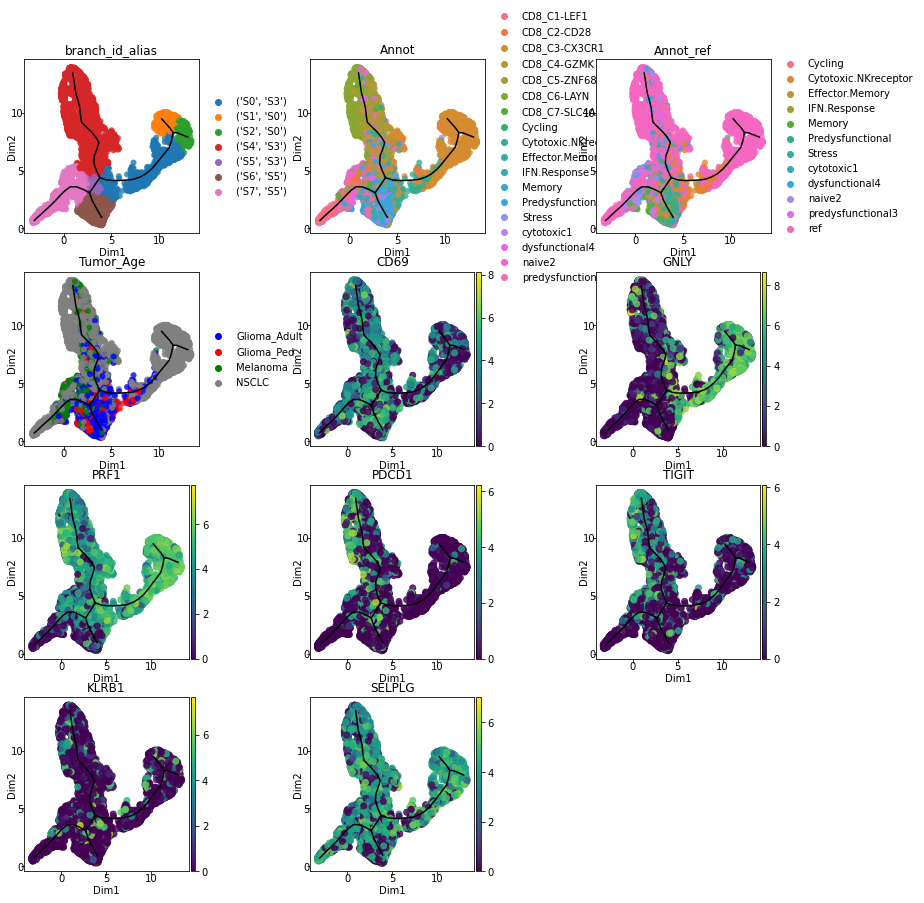

In [14]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['branch_id_alias', 'Annot', 'Annot_ref', 'Tumor_Age',
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG"],show_graph=True,show_text=False)
figure = plt.gcf()

figure.set_size_inches(12, 12)
plt.savefig(figure_dir + "/glioma.melanomaMap_trajectory_flat.png", dpi=600)

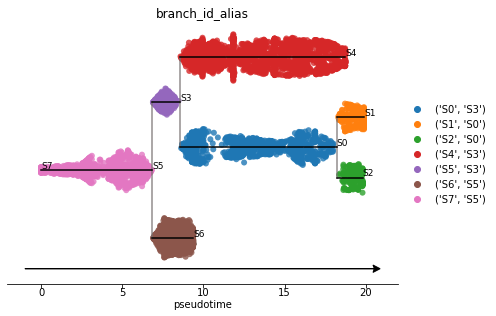

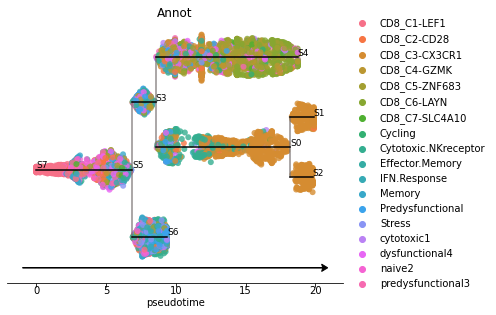

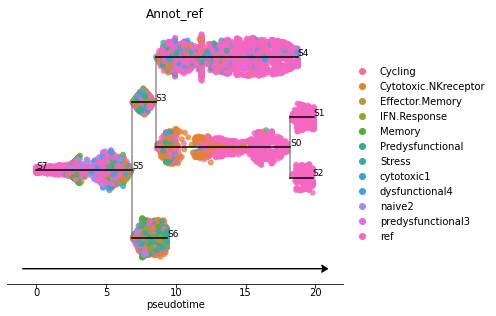

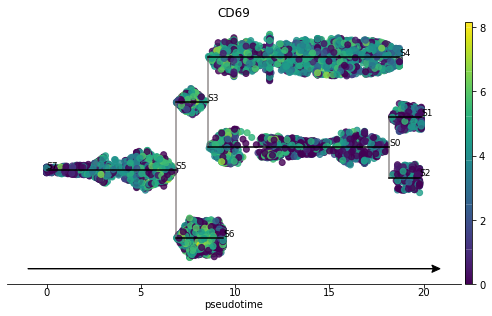

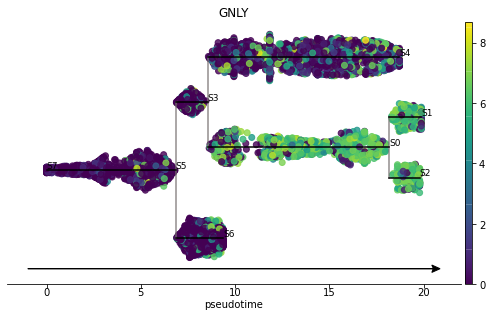

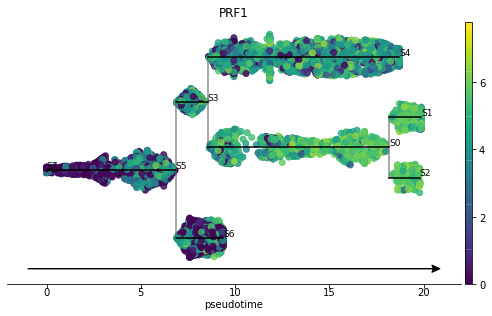

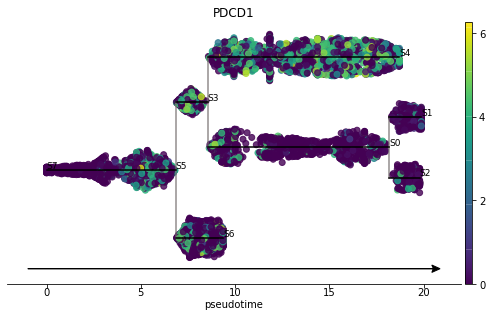

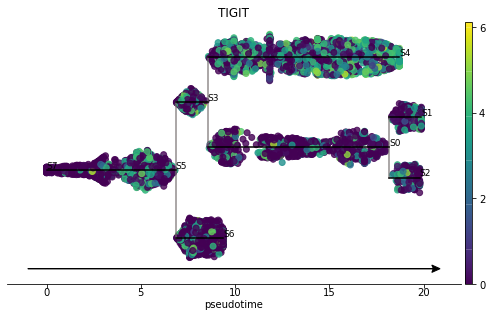

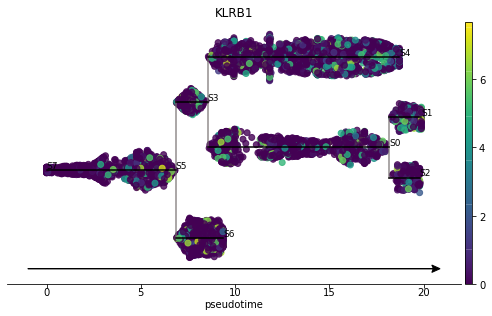

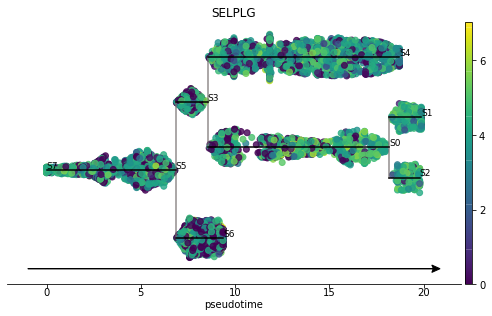

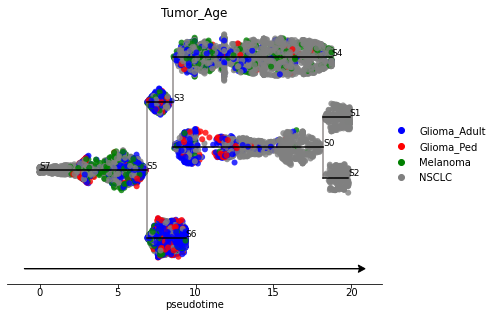

In [17]:
st.plot_stream_sc(adata_combined,root='S7',color=['branch_id_alias', 'Annot', 'Annot_ref', 
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG",'Tumor_Age'],
                  dist_scale=0.5,show_graph=True,show_text=True)

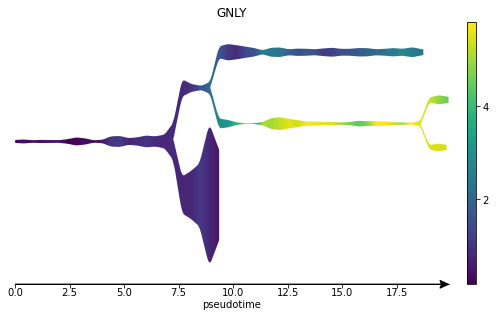

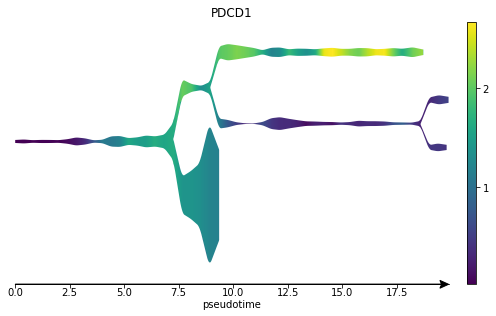

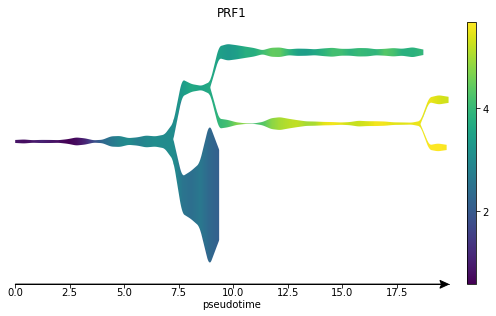

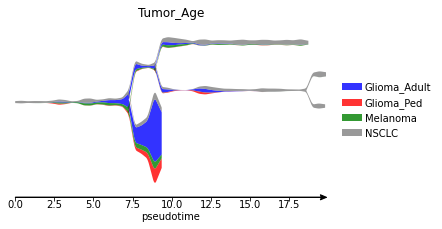

In [38]:
st.plot_stream(adata_combined,root='S7',color=['GNLY', 'PDCD1', 'PRF1','Tumor_Age'],
               dist_scale=3,factor_num_win=1, factor_width=1, factor_zoomin=10)
figure = plt.gcf()

figure.set_size_inches(6, 3)
plt.savefig(figure_dir + "/glioma.melanomaMap_trajectory_stream.png", dpi=600)

In [34]:
?st.plot_stream

In [25]:
## Set analysis name- for reading/writing data
analysis_name="cd8"

## Load h5ad object (from seurat)
filename="analysis/STREAM/" + analysis_name + ".h5ad"
adata_new = scanpy.read_h5ad(filename)
#st.set_workdir(adata_new,'./stream_result')

## Make variable names unique
adata_new.var_names_make_unique()

## Convert to array
adata_new.X=adata_new.X.toarray()

## Calculate QC metrics
#sbt.cal_qc(adata_new,assay='rna')

###Remove mitochondrial genes 
#st.remove_mt_genes(adata_new)
#st.add_cell_labels(adata_new,file_name='./cell_perturbation_label.tsv')
#st.add_cell_colors(adata_new,file_name='./cell_perturbation_label_color.tsv')

#### Subset to individual datasets (excluding ref)

In [ ]:
## Subset to individual datasets (excluding ref)
adata_combined_gm = adata_combined[np.isin(adata_combined.obs.Tumor_Age,['Glioma_Ped','Glioma_Adult', 'Melanoma'])].copy()

In [104]:
adata_combined_gm.obs["Nature2020MaxScore"]=gm_adata.obs["cellAnnot"]


array([nan], dtype=object)

In [102]:
gm_adata.obs['column'] = gm_adata.obs['maxGeneset'].astype('|S')
gm_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,RNA_snn_res.0.8,seurat_clusters,age_numeric,cellAnnot,NiceSubtype,TumorType,...,branch_dist,S0_pseudotime,S3_pseudotime,S4_pseudotime,S2_pseudotime,S1_pseudotime,S7_pseudotime,S6_pseudotime,S5_pseudotime,column
MGH207_P4_G06,0,999999.97,1876,MGH207,1,1,37.9,Memory,IDH-G,Glioma,...,0.837956,13.712267,4.066867,14.243483,15.312560,15.401004,9.227668,0.128690,2.373573,b'naive2'
E_42_P4_B03_E42_CD4.CD8._P3P4P5P6,0,1000000.09,585,E42,9,9,46.8,Stress,IDH-G,Glioma,...,0.944929,13.582488,3.937088,14.113704,15.182781,15.271225,9.097889,0.258469,2.243794,b'cytotoxic1'
E_42_P4_G01_E42_CD4.CD8._P3P4P5P6,0,999999.79,1501,E42,0,0,46.8,Memory,IDH-G,Glioma,...,0.962600,13.121500,3.476100,13.652716,14.721793,14.810237,8.636901,0.719457,1.782806,b'naive2'
E60_P3_A05_E48.2_CD4.CD8._P3P4,0,999999.94,621,E48.2,1,1,25.9,Predysfunctional,IDH-G,Glioma,...,0.948055,13.674055,4.028656,14.205272,15.274349,15.362792,9.189457,0.166901,2.335362,b'predysfunctional3'
E60_P4_D12_E48.2_CD4.CD8._P3P4,0,999999.86,621,E48.2,1,1,25.9,Memory,IDH-G,Glioma,...,0.857535,13.645972,4.000573,14.177189,15.246266,15.334709,9.161374,0.194984,2.307279,b'naive2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_1__S25_comb,0,1000000.00,5447,Sample75,1,1,NA,M2,Melanoma,Melanoma,...,1.219977,13.419579,3.774179,13.950795,15.019872,15.108316,4.773210,4.583148,2.080885,b'naive2'
CY75_1_CD45_CD8_7__S223_comb,0,1000000.00,5385,Sample75,1,1,NA,M0,Melanoma,Melanoma,...,0.115331,11.466763,1.821364,11.997980,13.067057,13.155500,6.982165,2.374193,0.128070,b'dysfunctional4'
CY75_1_CD45_CD8_1__S65_comb,0,1000000.00,4769,Sample75,0,0,NA,M3,Melanoma,Melanoma,...,0.053033,11.877479,2.232080,12.408696,13.477773,13.566216,7.392881,1.963477,0.538786,b'dysfunctional4'
CY75_1_CD45_CD8_1__S93_comb,0,1000000.00,4727,Sample75,2,2,NA,M3,Melanoma,Melanoma,...,0.531484,11.887428,2.242028,12.418644,13.487721,13.576165,7.402829,1.953529,0.548734,b'dysfunctional4'


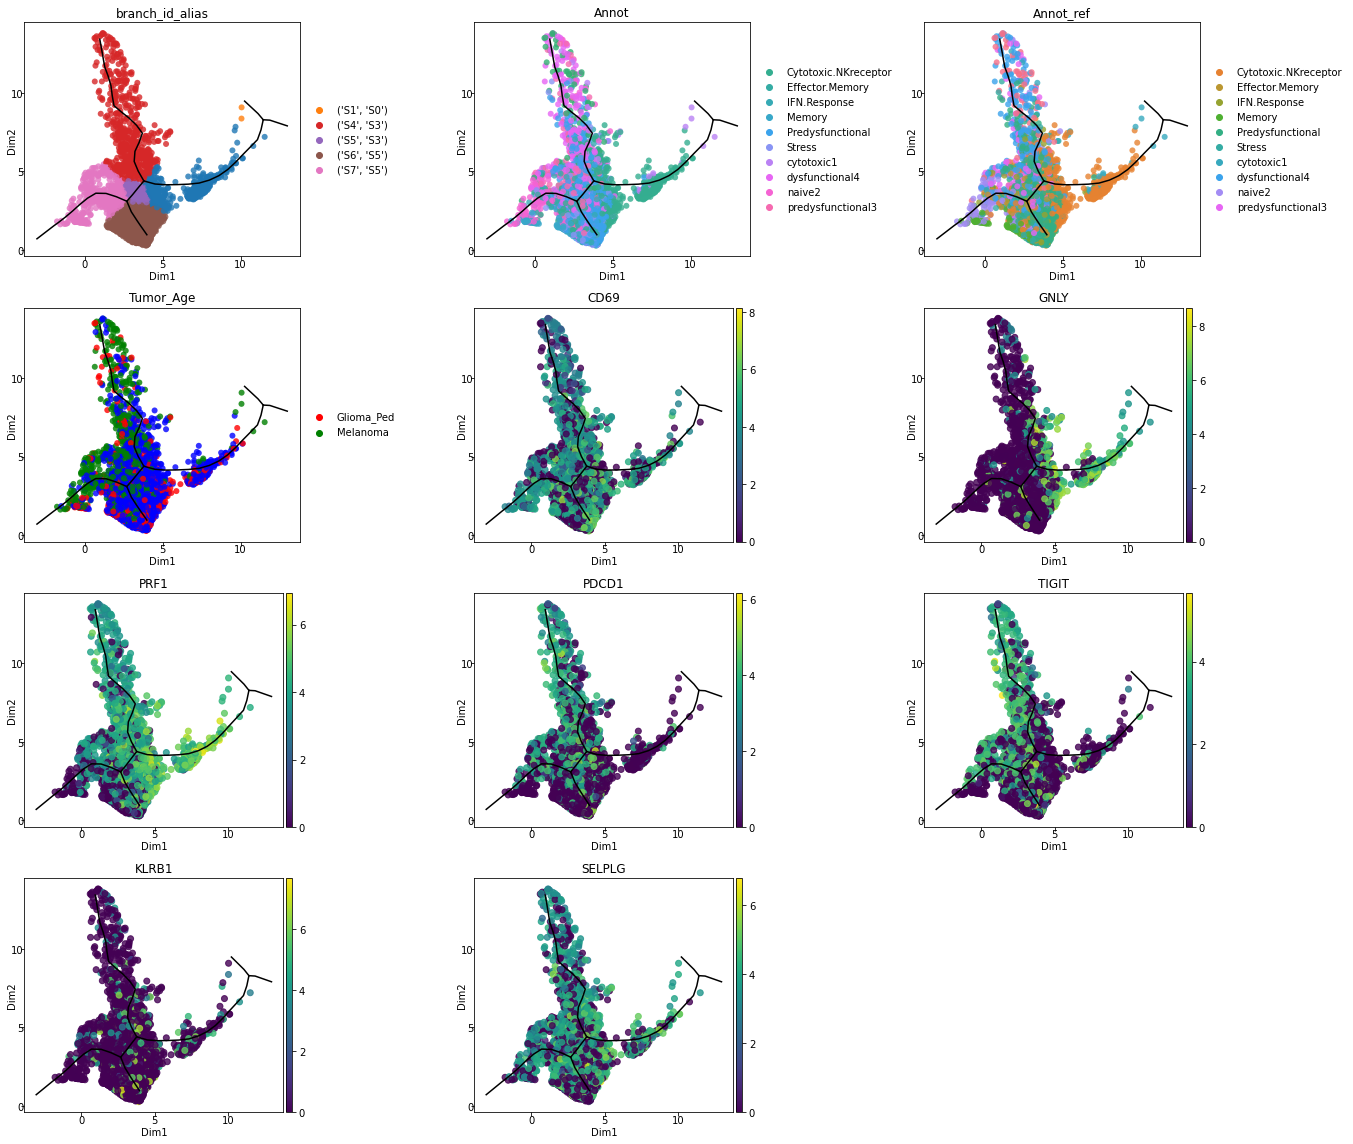

In [84]:
## Plot
st.plot_dimension_reduction(adata_combined_gm,color=['branch_id_alias', 'Annot', 'Annot_ref', 'Tumor_Age',
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG"],show_graph=True,show_text=False)
#figure = plt.gcf()

#figure.set_size_inches(12, 12)
#plt.savefig(figure_dir + "/glioma.melanomaMap_trajectory_flat.png", dpi=600)

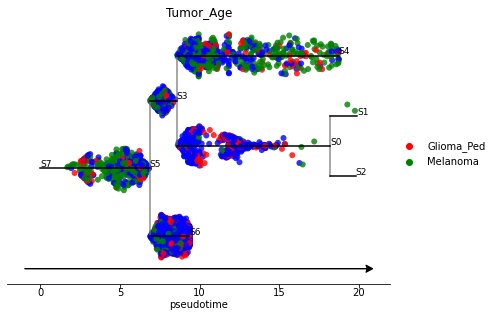

In [50]:
st.plot_stream_sc(adata_combined_gm,root='S7',color=['Tumor_Age'],
                  dist_scale=0.5,show_graph=True,show_text=True)

In [48]:
np.unique(adata_combined_gm.obs.Tumor_Age)

array(['Glioma_Adult', 'Glioma_Ped', 'Melanoma'], dtype=object)

> Here the input datasets have been normalized. So we skipped the normalization step. For new datasets with raw counts, please exectute:
```python
st.normalize(adata_new,method='lib_size')
st.log_transform(adata_new)
st.remove_mt_genes(adata_new)
```

In [26]:
### add new labels to highlight the new data
adata_combined.obs['label_new'] = ''
adata_combined.obs.loc[adata.obs_names+'-ref','label_new'] = 'ref'
adata_combined.obs.loc[adata_new.obs_names+'-new','label_new'] = adata_combined.obs.loc[adata_new.obs_names+'-new','label']
adata_combined.uns['label_new_color'] = {'ref':'gray',**adata_new.uns['label_color']}

In [27]:
adata_combined

AnnData object with n_obs × n_vars = 570 × 12445
    obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S5_pseudotime', 'S2_pseudotime', 'S4_pseudotime', 'S1_pseudotime', 'S3_pseudotime', 'batch', 'label_new'
    uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'label_new_color'
    obsm: 'var_genes', 'X_dr', 'X_vis_umap'

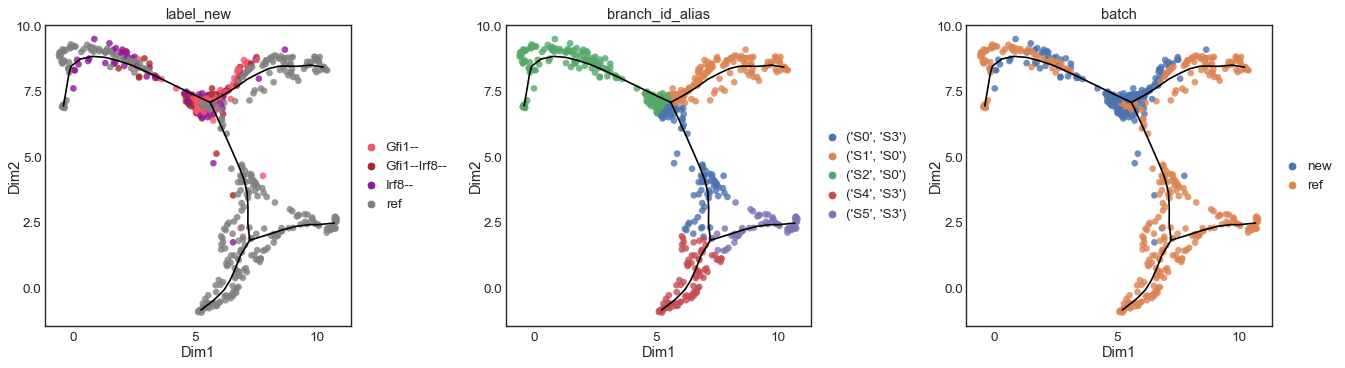

In [28]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['label_new','branch_id_alias','batch'],show_graph=True,show_text=False)

Importing precomputed umap visualization ...


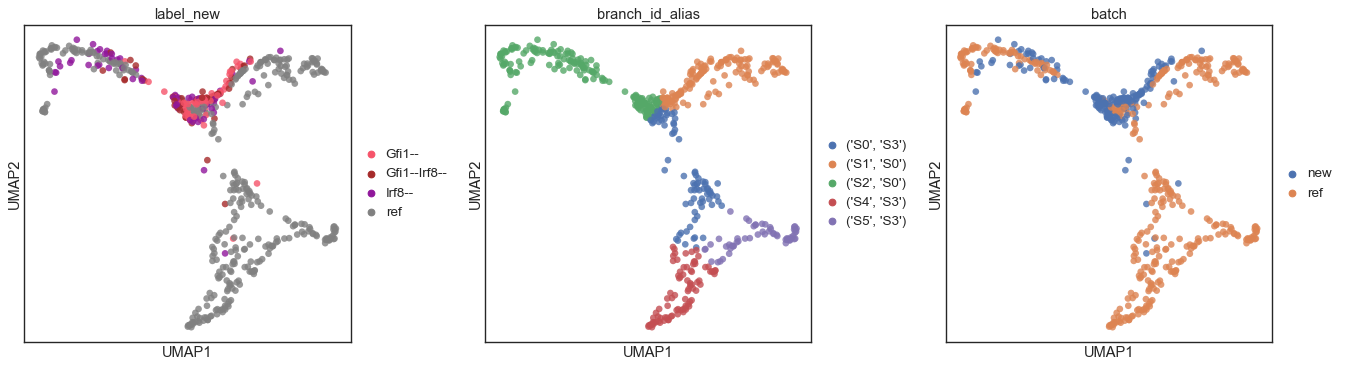

In [29]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

Importing precomputed umap visualization ...


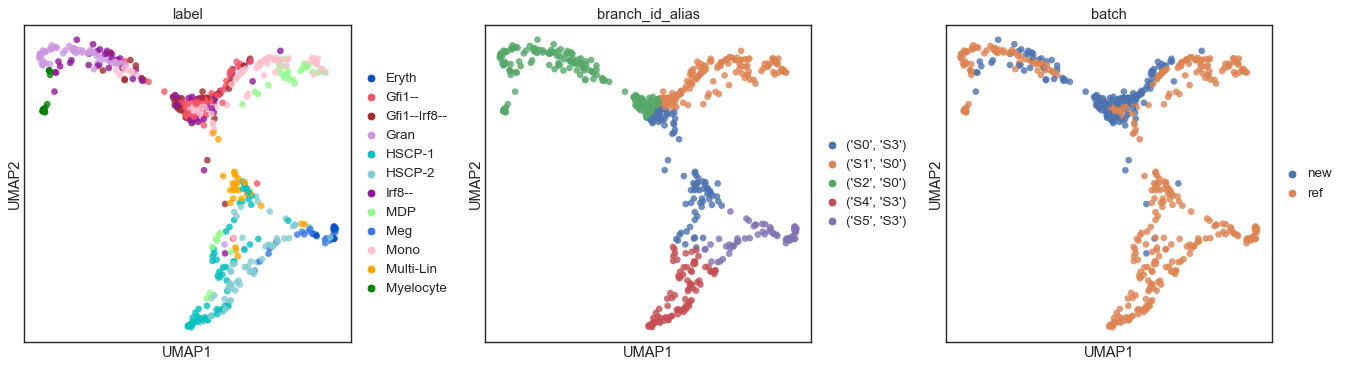

In [30]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label','branch_id_alias','batch'],fig_ncol=4)

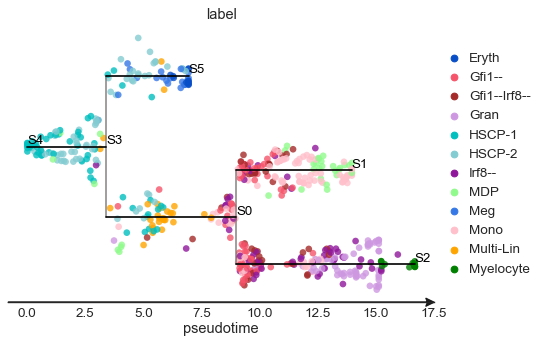

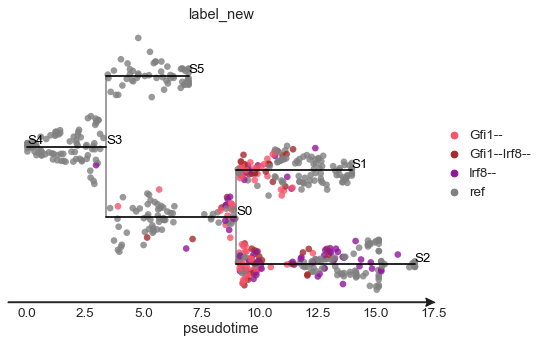

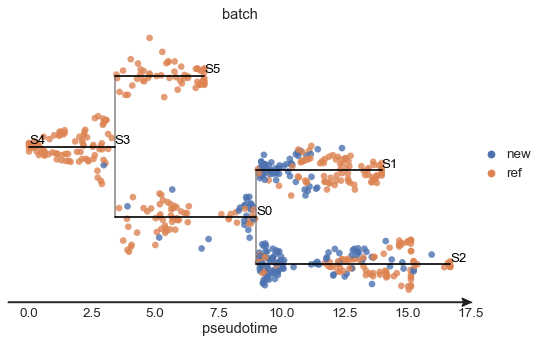

In [31]:
st.plot_stream_sc(adata_combined,root='S4',color=['label','label_new','batch'],
                  dist_scale=0.5,show_graph=True,show_text=True)

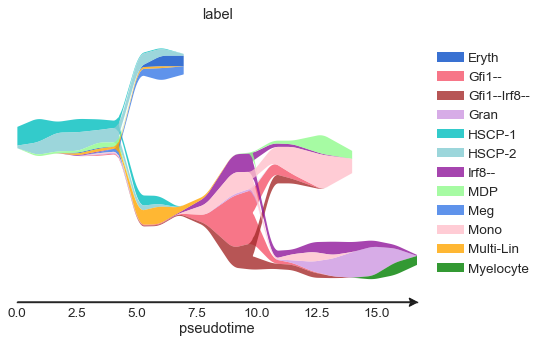

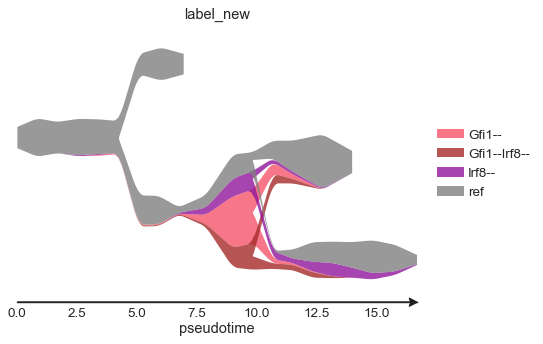

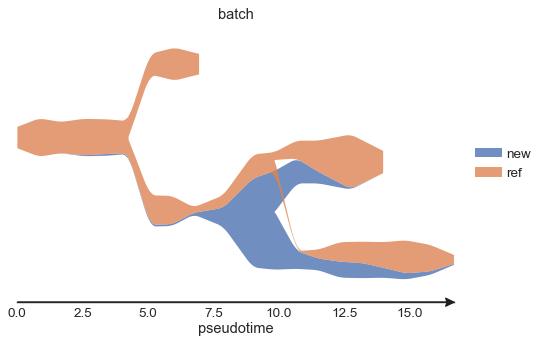

In [32]:
st.plot_stream(adata_combined,root='S4',color=['label','label_new','batch'],dist_scale=1.2)

#### Visualize each perturbation dataset independently

In [33]:
import numpy as np

In [34]:
adata_combined_Gfi1_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--','ref'])].copy()

Importing precomputed umap visualization ...


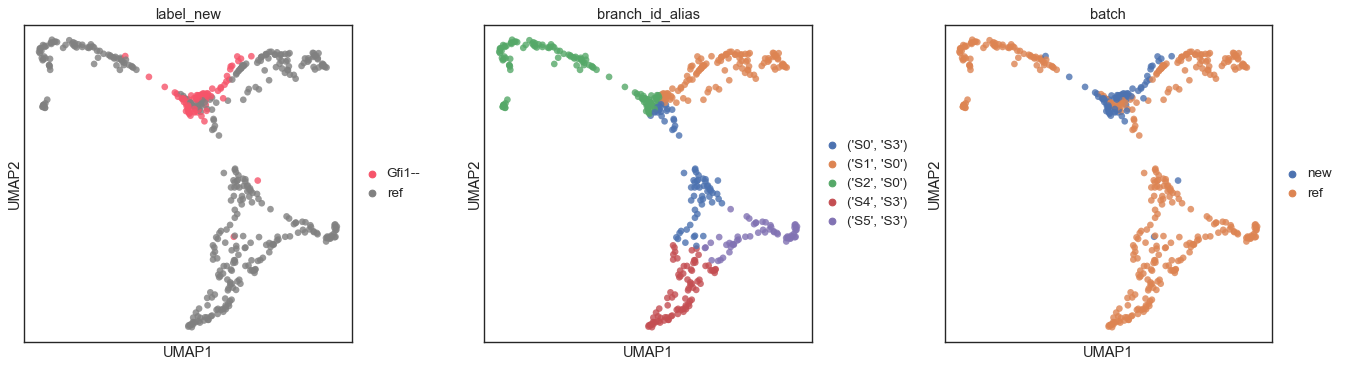

In [35]:
st.plot_visualization_2D(adata_combined_Gfi1_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

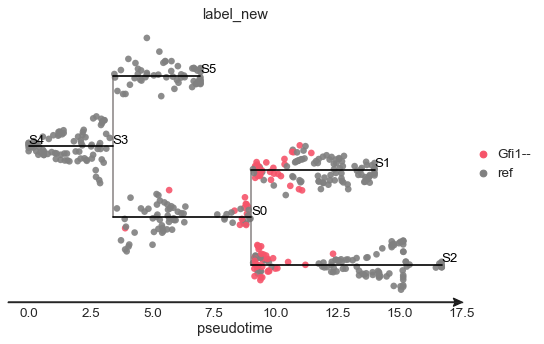

In [36]:
st.plot_stream_sc(adata_combined_Gfi1_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

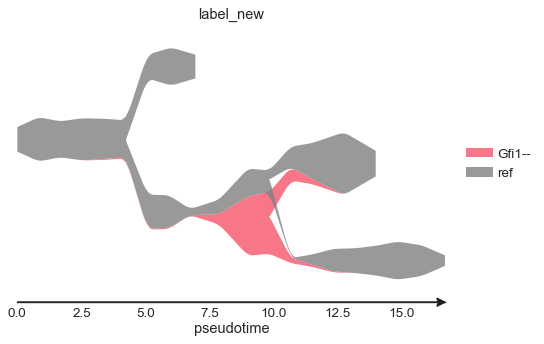

In [37]:
st.plot_stream(adata_combined_Gfi1_Null,root='S4',color=['label_new'])

In [38]:
adata_combined_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


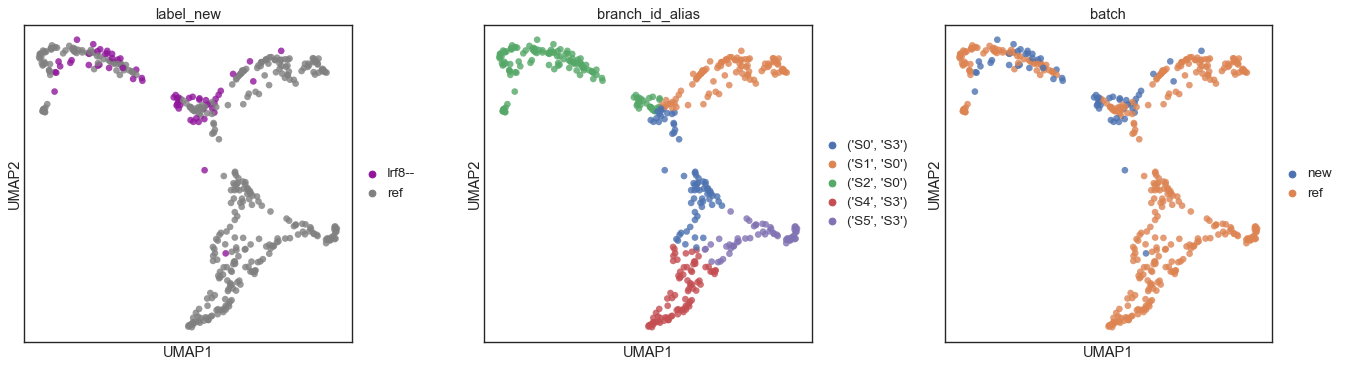

In [39]:
st.plot_visualization_2D(adata_combined_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

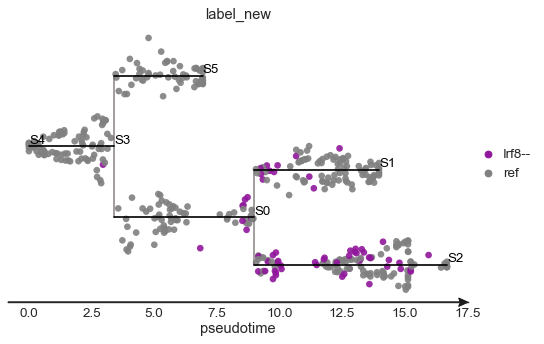

In [40]:
st.plot_stream_sc(adata_combined_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

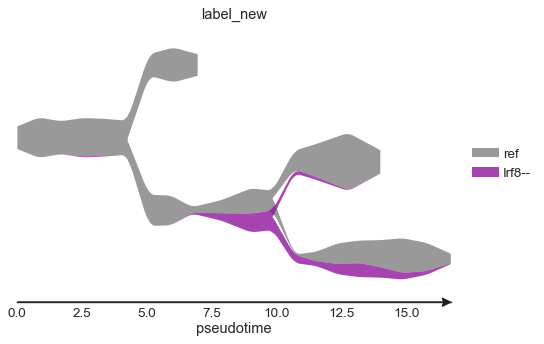

In [41]:
st.plot_stream(adata_combined_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.6,
               fig_legend_order={'label_new':['ref','Irf8--',]})

In [42]:
adata_combined_Gfi1_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


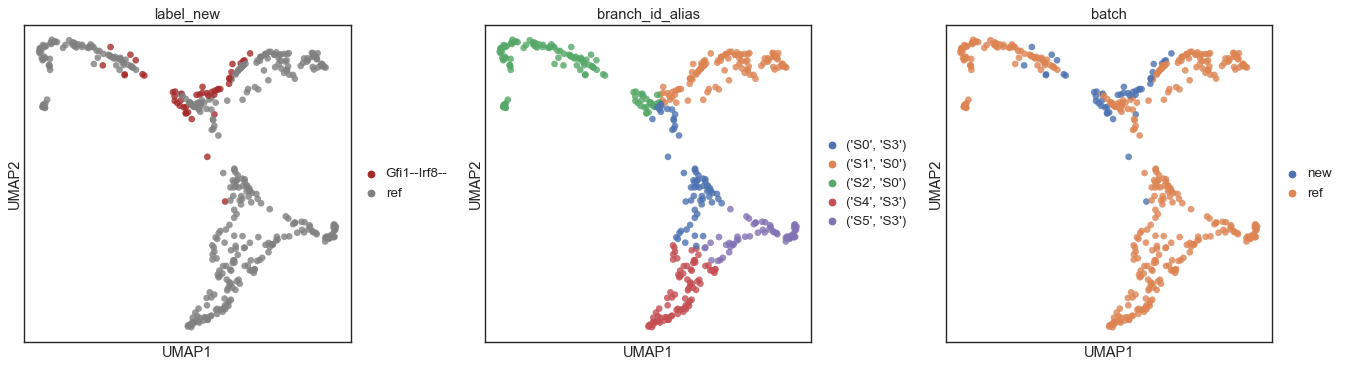

In [43]:
st.plot_visualization_2D(adata_combined_Gfi1_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

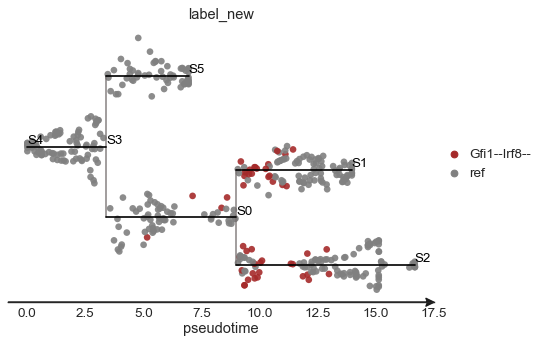

In [44]:
st.plot_stream_sc(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

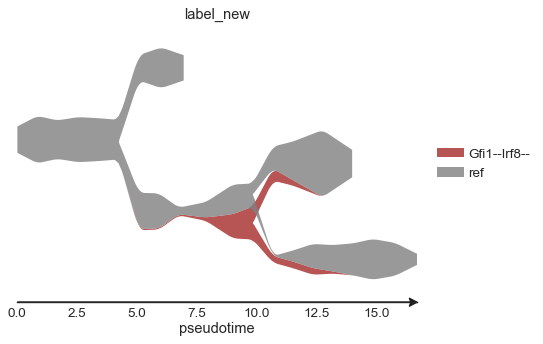

In [45]:
st.plot_stream(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.7)

In [46]:
st.write(adata,file_name='adata.pkl')
st.write(adata_new,file_name='adata_new.pkl')
st.write(adata_combined,file_name='adata_combined.pkl')